#  COVID-19
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.

Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow).

At this time, there are no specific vaccines or treatments for COVID-19. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information as soon as clinical findings become available.


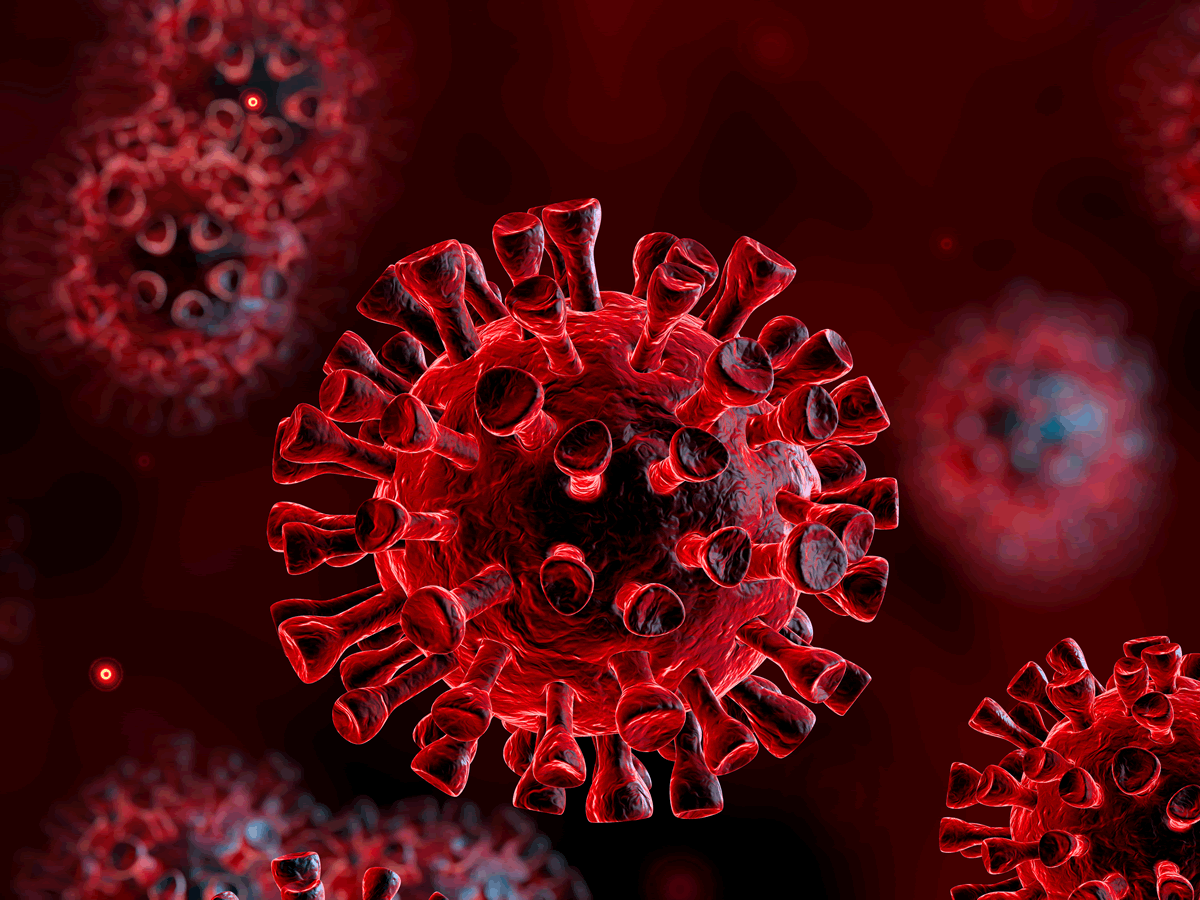


# INTRODUCTION
Hi fellow Kagglers!
In this kernel we will try to do detailed analysis of the situation of Covid -19 and how did it spread out.
We will try to understand the situation of India, how specific it folded out for them !!

# COVID-19 

Import all the required libraries !!(Although a lot of visualization are only made through Tableau :P)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
# datetime oprations
from datetime import timedelta
# to get web contents
from urllib.request import urlopen
import matplotlib.pyplot as plt
# advanced ploting
import seaborn as sns

# interactive visualization
import plotly.express as px
import plotly.graph_objs as go
# import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# for offline ploting
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Reading all the files which will be required.

In [ ]:
Covid_India=pd.read_csv('/kaggle/input/covid19-in-india/covid_19_india.csv')
Individual_Details=pd.read_csv('/kaggle/input/covid19-in-india/IndividualDetails.csv')
HospitalBeds=pd.read_csv('/kaggle/input/covid19-in-india/HospitalBedsIndia.csv')
AgeGroupDetails=pd.read_csv('/kaggle/input/covid19-in-india/AgeGroupDetails.csv')
ICMR=pd.read_csv('/kaggle/input/covid19-in-india/ICMRTestingLabs.csv')
India_population=('/kaggle/input/covid19-in-india/population_india_census2011.csv')
Covid_World=pd.read_csv('/kaggle/input/corona-virus-report/covid_19_clean_complete.csv')
country_wise = pd.read_csv('../input/corona-virus-report/country_wise_latest.csv')
country_wise = country_wise.replace('', np.nan).fillna(0)
worldometer_data = pd.read_csv('../input/corona-virus-report/worldometer_data.csv')
worldometer_data = worldometer_data.replace('', np.nan).fillna(0)
Covid_India.head()

In [ ]:
Covid_India.value_counts()

Let's check out the recent information with regards to the Indian States !!

In [ ]:
Covid_India.tail(35)

In [ ]:
Covid_World.tail(50)

In [ ]:
%%HTML 
<div class='tableauPlaceholder' id='viz1600186061702' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;Covid-19CasesaroundtheWorld&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Covid-19CasesaroundtheWorld&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;Covid-19CasesaroundtheWorld&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1600186061702');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
%%HTML 
<div class='tableauPlaceholder' id='viz1600111731555' style='position: relative'><noscript><a href='https:&#47;&#47;public.tableau.com&#47;profile&#47;sahil.maheshwari#!&#47;vizhome&#47;Book2_16001108085170&#47;Sheet1'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book2_16001108085170&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Book2_16001108085170&#47;Sheet1' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Bo&#47;Book2_16001108085170&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1600111731555');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1600191205999' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;Covid-19CasesaroundtheWorld-1&#47;Sheet3&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Covid-19CasesaroundtheWorld-1&#47;Sheet3' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;Covid-19CasesaroundtheWorld-1&#47;Sheet3&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1600191205999');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
%%HTML
<div class='tableauPlaceholder' id='viz1600199299285' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CovidAnalysisofIndia&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CovidAnalysisofIndia&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Co&#47;CovidAnalysisofIndia&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1600199299285');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Notice how the graph for India looks steeper , the speed of spread is much higher than the global average. Although it could be that I am wrong , however it seems that the covid cases in India are peaking .

In [ ]:
plt.figure(figsize=(20,10))
x = sns.stripplot(x = "WHO Region", y = "Deaths", data = Covid_World, jitter = True)
plt.xticks(rotation = 90)
plt.title("Covid Deaths According to the Region", color = 'red', fontsize = 20)
plt.show()

Doing a regional wise analysis of Covid-19 spread , even though the virus was spread in China , the highest amount of deaths currently are in United States and Europe , which is very interesting . One could naively assume that the negliengence of the authorities could play the part here . However , a lot of factors might play their role here .

In [ ]:
dataframe=Covid_World

trace1 = go.Scatter(
    x = dataframe.Date,
    y = dataframe.Confirmed,
    name = "Economy",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)')
) 
data = [trace1]
fig = go.Figure(data = data)
iplot(fig)

In [ ]:
dataframe=Covid_India

trace1 = go.Scatter(
    x = dataframe.Date,
    y = dataframe.Confirmed,
    name = "Economy",
    marker = dict(color = 'rgba(132, 112, 2, 0.8)')
) 
data = [trace1]
fig = go.Figure(data = data)
iplot(fig)

# WORK IN PROGRESS